Mall Customer Kmeans


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df=pd.read_csv('Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [ ]:
df.isnull().sum()/df.shape[0]*100

,0
CustomerID,0.0
Gender,0.0
Age,0.0
Annual Income (k$),0.0
Spending Score (1-100),0.0


In [ ]:
#dropping customer id as it is of no use
df.drop(["CustomerID"],axis=1,inplace=True)

In [ ]:
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


<ipython-input-10-76762729a9e0>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


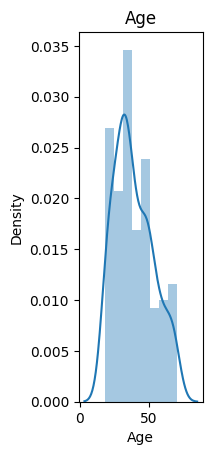

<ipython-input-10-76762729a9e0>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


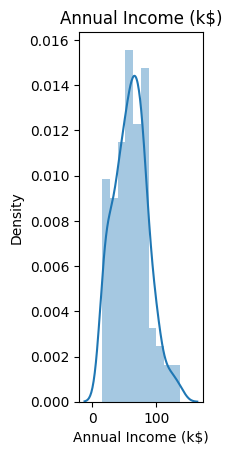

<ipython-input-10-76762729a9e0>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


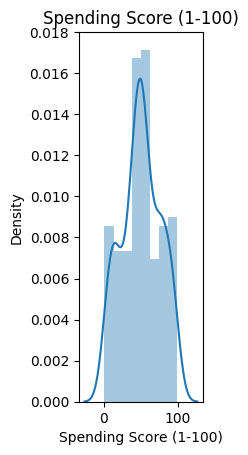

In [ ]:
list=["Age","Annual Income (k$)","Spending Score (1-100)"]
k=0;
for i in list:
  k+=1
  plt.subplot(1,3,k)
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  plt.title(i)
  sns.distplot(df[i])
  plt.show()

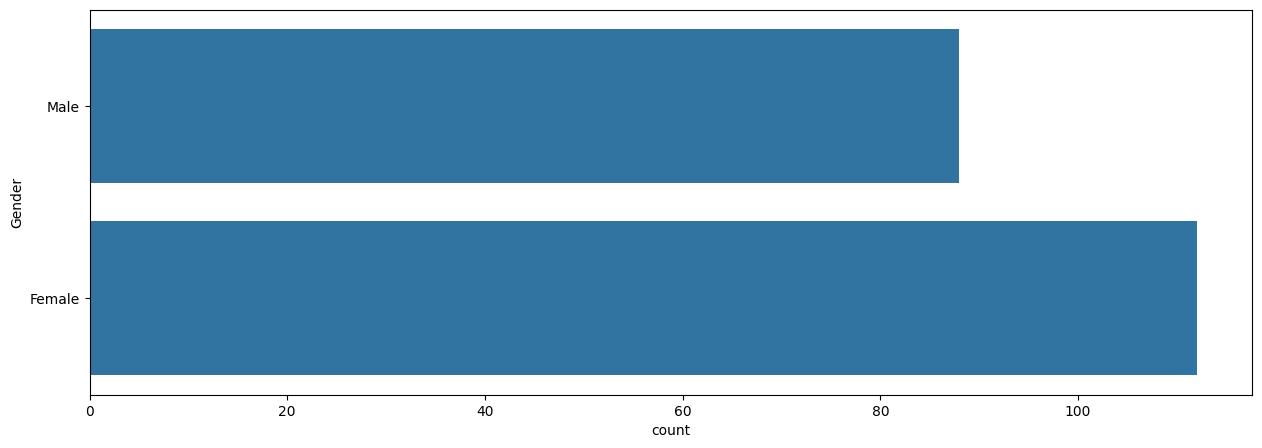

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(df["Gender"])
plt.show()

<ipython-input-12-a265e4942d4e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agex,y=agey,palette='tab10')


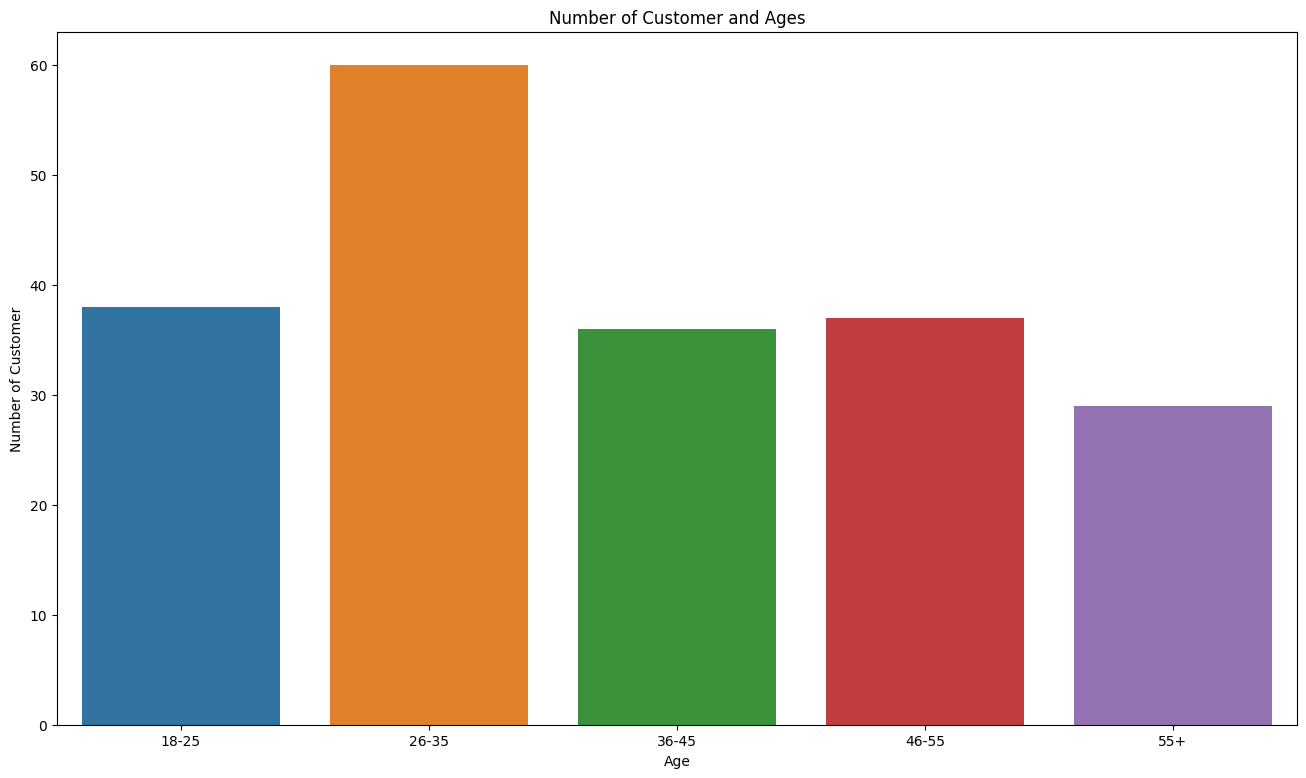

In [ ]:
age_18_25=df.Age[(df.Age<=25)&(df.Age>=18)]
age_26_35=df.Age[(df.Age<=35)&(df.Age>=26)]
age_36_45=df.Age[(df.Age<=45)&(df.Age>=36)]
age_46_55=df.Age[(df.Age<=55)&(df.Age>=46)]
age_55above=df.Age[df.Age>=56]
agey=[len(age_18_25),len(age_26_35),len(age_36_45),len(age_46_55),len(age_55above)]
agex=['18-25','26-35','36-45','46-55','55+']
plt.figure(figsize=(16,9))
sns.barplot(x=agex,y=agey,palette='tab10')
plt.title('Number of Customer and Ages')
plt.xlabel('Age')
plt.ylabel('Number of Customer')
plt.show()

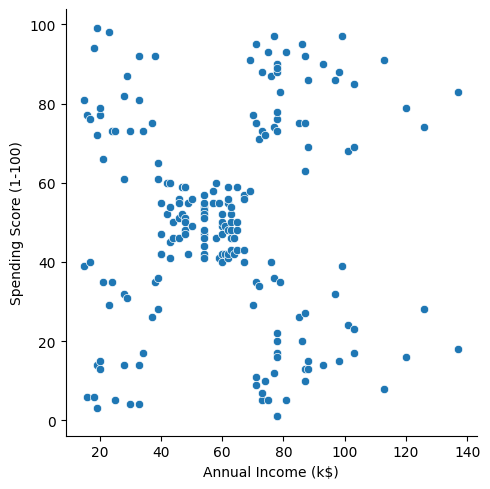

In [ ]:
sns.relplot(y="Spending Score (1-100)",x="Annual Income (k$)",data=df)
plt.show()

<ipython-input-14-ed296d6793d8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ssx,y=ssy,palette='tab10')


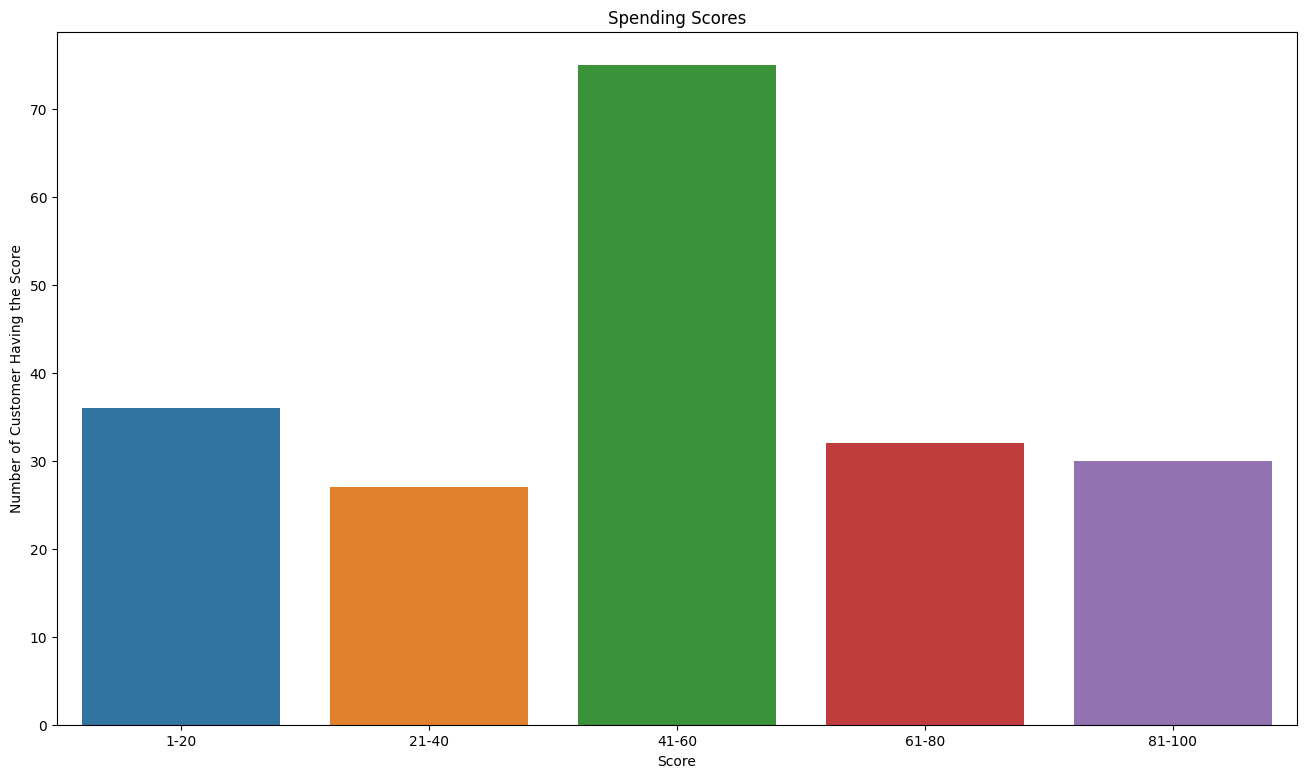

In [ ]:
from ssl import SSLContext
ss_1_20=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=1)&(df["Spending Score (1-100)"]<=20)]
ss_21_40=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=21)&(df["Spending Score (1-100)"]<=40)]
ss_41_60=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=41)&(df["Spending Score (1-100)"]<=60)]
ss_61_80=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=61)&(df["Spending Score (1-100)"]<=80)]
ss_81_100=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=81)&(df["Spending Score (1-100)"]<=100)]
ssx=['1-20','21-40','41-60','61-80','81-100']
ssy=[len(ss_1_20),len(ss_21_40),len(ss_41_60),len(ss_61_80),len(ss_81_100)]
plt.figure(figsize=(16,9))
sns.barplot(x=ssx,y=ssy,palette='tab10')
plt.title('Spending Scores')
plt.xlabel('Score')
plt.ylabel('Number of Customer Having the Score')
plt.show()

<ipython-input-15-91b78ac9273e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aix,y=aiy,palette='tab10')


Text(0, 0.5, 'Number of Customer')

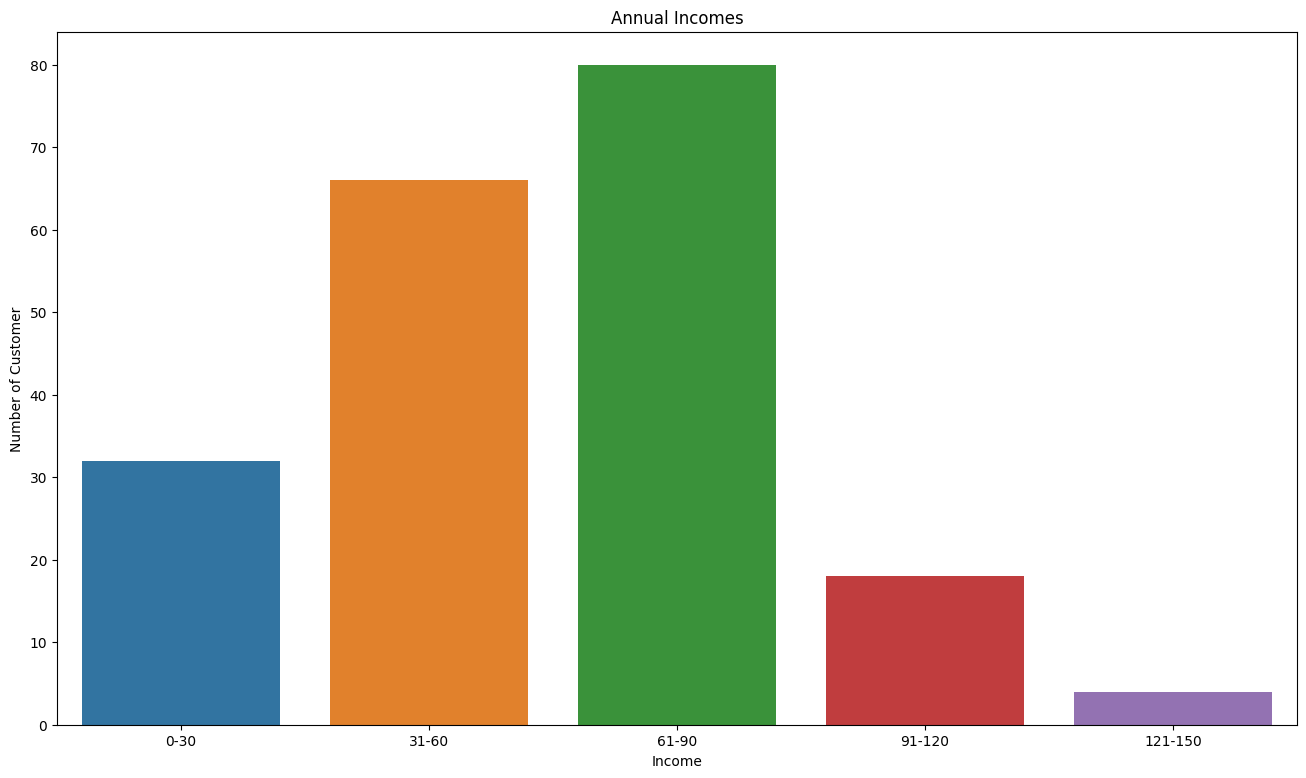

In [ ]:
ai_0_30=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=0)&(df["Annual Income (k$)"]<=30)]
ai_31_60=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=31)&(df["Annual Income (k$)"]<=60)]
ai_61_90=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=61)&(df['Annual Income (k$)']<=90)]
ai_91_120=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=91)&(df["Annual Income (k$)"]<=120)]
ai_121_150=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=121)&(df["Annual Income (k$)"]<=150)]
aix=['0-30','31-60','61-90','91-120','121-150']
aiy=[len(ai_0_30),len(ai_31_60),len(ai_61_90),len(ai_91_120),len(ai_121_150)]
plt.figure(figsize=(16,9))
sns.barplot(x=aix,y=aiy,palette='tab10')
plt.title('Annual Incomes')
plt.xlabel('Income')
plt.ylabel('Number of Customer')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

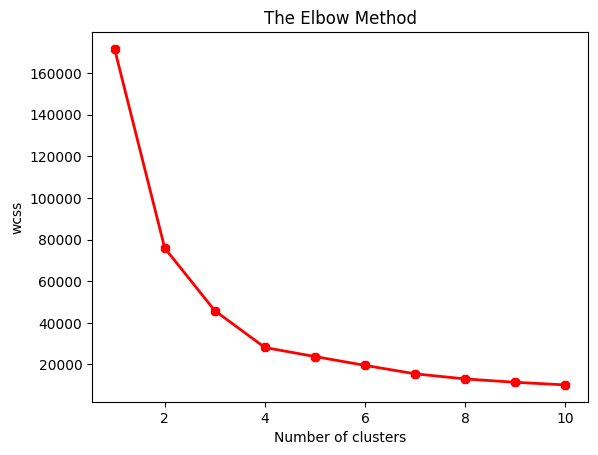

In [ ]:
x1=df.loc[:,["Age","Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42) # Use the loop variable 'i' for number of clusters
  kmeans.fit(x1) # Call fit on the kmeans object, not the class
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
Kmeans=KMeans(n_clusters=4)
label=Kmeans.fit_predict(x1)
print(label)

[2 0 1 0 2 0 1 0 1 0 1 0 1 0 1 0 2 2 1 0 2 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1
 0 1 0 3 0 3 2 1 2 3 2 2 2 3 2 2 3 3 3 3 3 2 3 3 2 3 3 3 2 3 3 2 2 3 3 3 3
 3 2 3 2 2 3 3 2 3 3 2 3 3 2 2 3 3 2 3 2 2 2 3 2 3 2 2 3 3 2 3 2 3 3 3 3 3
 2 2 2 2 2 3 3 3 3 2 2 2 0 2 0 3 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0 2 0 1 0 3 0
 1 0 1 0 1 0 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 2
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
#checking centroids
print(Kmeans.cluster_centers_)

[[30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [27.61702128 49.14893617]
 [55.70833333 48.22916667]]


**Scatter Plot between Age and Spending Scores**

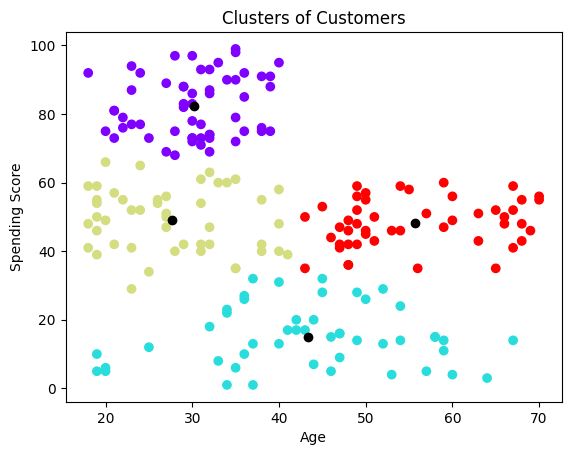

In [ ]:
plt.scatter(x1[:,0],x1[:,1],c=Kmeans.labels_,cmap='rainbow') # Use the 'label' variable here
plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1],color='black')

plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

**Scatter Plot between Annual Income and Spending score**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

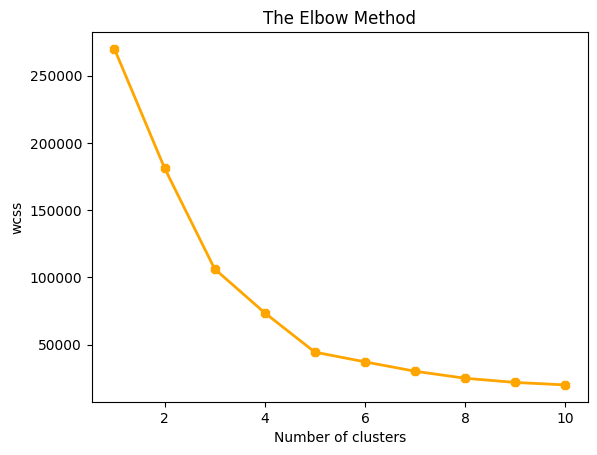

In [ ]:
x2=df.loc[:,["Annual Income (k$)","Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42) # Use the loop variable 'i' for number of clusters
  kmeans.fit(x2) # Call fit on the kmeans object, not the class
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,linewidth=2,color="orange",marker="8")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
Kmeans=KMeans(n_clusters=5)
label=Kmeans.fit_predict(x2)
print(label)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 2 4 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 1 3 2 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3 2 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
#checking centroids
print(Kmeans.cluster_centers_)

[[25.72727273 79.36363636]
 [88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]]


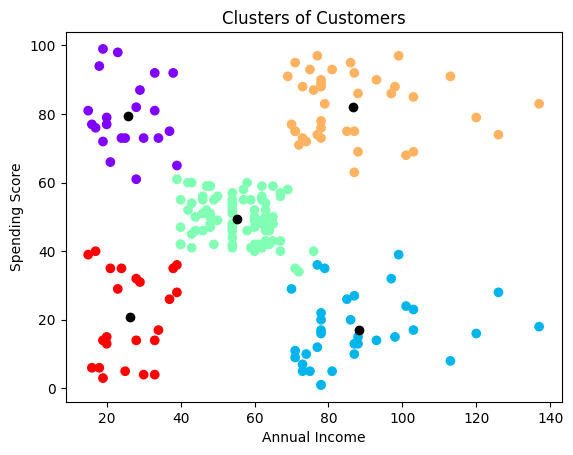

In [ ]:
plt.scatter(x2[:,0],x2[:,1],c=Kmeans.labels_,cmap='rainbow') # Use the 'label' variable here
plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1],color='black')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

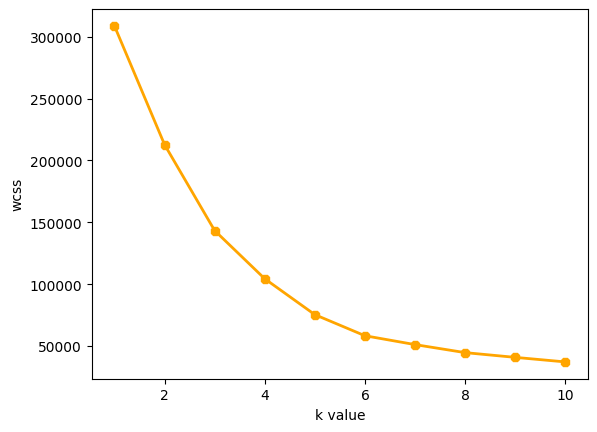

In [ ]:
x3=df.iloc[:,1:]
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42) # Use the loop variable 'i' for number of clusters
  kmeans.fit(x3) # Call fit on the kmeans object, not the class
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,linewidth=2,color="orange",marker="8")
plt.xlabel('k value')
plt.ylabel('wcss')
plt.show()

In [ ]:
Kmeans=KMeans(n_clusters=5)
label=Kmeans.fit_predict(x3)
print(label)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
print(Kmeans.cluster_centers_)

[[40.66666667 87.75       17.58333333]
 [43.08860759 55.29113924 49.56962025]
 [32.69230769 86.53846154 82.12820513]
 [25.52173913 26.30434783 78.56521739]
 [45.2173913  26.30434783 20.91304348]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


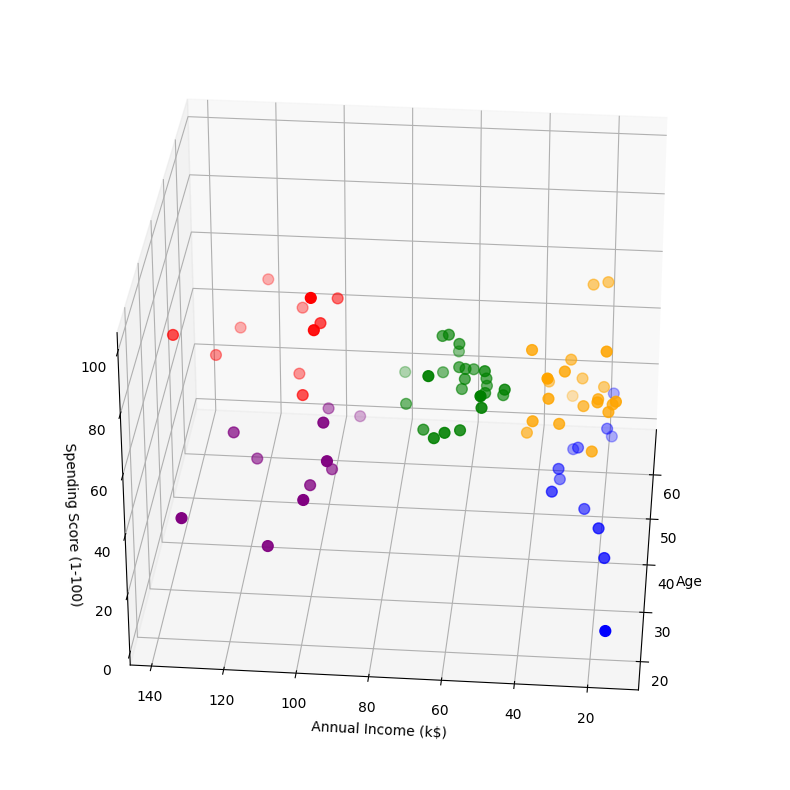

In [ ]:
clusters=kmeans.fit_predict(x3)
df["label"]=clusters
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df.Age[df.label==0],df["Annual Income (k$)"][df.label==0],df["Spending Score (1-100)"][df.label==0],c='blue',s=60)
ax.scatter(df.Age[df.label==1],df["Annual Income (k$)"][df.label==1],df["Spending Score (1-100)"][df.label==1],c='red',s=60)
ax.scatter(df.Age[df.label==2],df["Annual Income (k$)"][df.label==2],df["Spending Score (1-100)"][df.label==2],c='green',s=60)
ax.scatter(df.Age[df.label==3],df["Annual Income (k$)"][df.label==3],df["Spending Score (1-100)"][df.label==3],c='orange',s=60)
ax.scatter(df.Age[df.label==4],df["Annual Income (k$)"][df.label==4],df["Spending Score (1-100)"][df.label==4],c='purple',s=60)
ax.view_init(30,185)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()